# FastText
fastText is a library for efficient learning of __word representations__ and __sentence classification__.

FastText可以做两件事情：训练词向量和文本分类

https://github.com/facebookresearch/fastText or

https://github.com/facebookresearch/fastText/tree/master/python

https://mp.weixin.qq.com/s?__biz=MzA3MzI4MjgzMw==&mid=2650718391&idx=2&sn=178148dd1df39d58576979eaa5bd8e0e&chksm=871b04c9b06c8ddf16a41af95b801af18e30e756aeb4d626ef33ab068fbe75b6114cabae3d35&scene=21#wechat_redirect


fastText是 Facebook 开发的一款快速文本分类器，提供简单而高效的文本分类和表征学习的方法，性能比肩深度学习而且速度更快

深度神经网络近期在文本处理中非常的流行。尽管这些模型在有限制的实验室实践中获得了非常好的表现，但训练和测试过程会很慢，限制了它们在大型数据集上的应用。



fastText 帮助解决这一问题。为了在有众多类别的大型数据集上有效，fastText 使用层级分类器而非平面结构，不同的类别被组织进一颗树中（想象二叉树而非 list）。从线性到有多种类别的对数模型，这大大减少了训练和测试文本分类器的时间。fastText 也利用类（class）不均衡这样的一个事实（一些类别出现次数要更多），通过使用 Huffman 算法建立用于表征类别（category）的树。因此，频繁类别的树的深度要比不频繁类别的树的深度要小，导致更进一步的计算效率。



fastText 也用一个更低维度的向量表征文本，这是通过总结对应文本中出现的词的向量所获得的。在 fastText 中，一个低维度向量与每个单词都相关。隐藏表征被不同类别中的所有分类器共享，使得从一个类别中学到的词信息被其他类别使用。这类表征被称为词袋（bag of words），忽视词序。在 fastText 中，我们也使用向量表征单词 n-gram，将局部词序考虑在内，这对很多文本分类问题都很重要。



我们的实验表明 fastText 在准确率上总是与深度学习分类器有同等水平，而且在训练和评估速率上要高数个等级。使用 fastText，我们总能够将训练时间从几天降至几秒，并且在许多标准问题上达到最先进的表现，例如情感分析或标签预测。

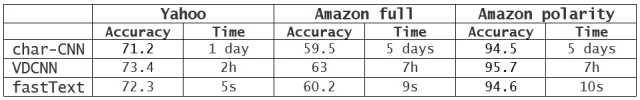

## Installation

In [2]:
# !pip install fasttext -U
!pip freeze | grep fasttext

fasttext==0.9.1


# Word representation model
data.txt is a training file containing utf-8 encoded text. 

In [17]:
import jieba

In [18]:
with open('data.txt', 'r') as f:
    ll = f.readlines()

In [20]:
with open('data1.txt', 'w', encoding='utf8') as f:
    f.writelines([' '.join(jieba.lcut(i)) for i in ll]*5)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/7j/kgtjln3x2dj2g2v57d5vncyw0000gp/T/jieba.cache
Loading model cost 0.793 seconds.
Prefix dict has been built succesfully.


## Skipgram model

In [24]:
import fasttext

# Skipgram model :
model = fasttext.train_unsupervised('data1.txt', model='skipgram')

The returned model object represents your learned model, and you can use it to retrieve information.

可以看出 读入的data1.txt 必须先分词，还要去除stopwords

In [25]:
print(model.words)   # list of words in dictionary

['，', '\u3000', '、', '</s>', '。', '的', '》', '《', '多', '是', '全唐诗', '；', '将', '唐代', '曹寅', '诗歌', '全书', '至', '即', '修书', '有', '诗', '一部', '成书', '编修', '人', '其', '四万', '二', '千八百', '：', '”', '“', '四十四年', '总集', '四', '彭定求', '当时', '也', '杨中', '讷', '等', '玄烨', '了', '编纂', '考订', '为', '次年', '十月', '一', '问题', '存在', '诗人', '【', '编成', '】', '官', '作者', '(', '校刊', '年', ')', '并', '亦', '较', '主持', '所', '共', '他', '三月', '1705', '第五次', '南巡', '苏州', '时', '此书', '考虑', '祖玄烨', '任务', '交给', '江宁', '织造', '清圣', '内府', '所藏', '季振宜', '唐诗', '发', '下', '作为', '1703', '底本', '同年', '五月', '由', '在', '扬州', '开局', '参加', '四十二年', '赋闲', '江南', '在籍', '翰林', '康熙', '沈三曾', '潘从律', '汪士', '綋', '徐树本', '车鼎晋', '汪绎', '查嗣', '瑮', '俞梅', '十人', '过程', '奏', '上', '最大', '规模', '唐', '一代', '汇为', '中国', '帙', '于', '研究者', '提供', '敕', '莫大', '方便', '但', '这样', '卷帙浩繁', '大书', '只', '以十人', '之力', '一年', '奉', '时间', '内', '就', '由于', '仓促', '曾', '很多', '沈立', '朱彝尊', '已有', '清康熙', '业经', '进呈', '不说', '首', '之叹', '六十三', '主要', '如下', '数端', '诗作', '未及', '广检群', '书', '故', '缺漏', '甚', '二十九', '二千五百', '粗疏', 

In [26]:
print(model['全唐诗']) # get the vector of the word '全唐诗'

[ 1.28223980e-02  8.87543522e-03  1.24236557e-03 -6.09060097e-03
 -7.61021953e-03  1.78115871e-02 -1.39875021e-02 -1.13296276e-03
 -4.09204792e-03  4.33590217e-03 -6.88037183e-03  8.20703525e-03
  6.13629294e-04 -6.02013606e-05 -3.99881462e-03  1.29648605e-02
 -7.25030620e-03 -9.59495641e-03  1.02877943e-02 -6.63488591e-03
 -5.62519487e-03 -8.91984440e-03  8.42833892e-03 -1.00067956e-02
 -9.83686559e-03  1.02327531e-02 -4.29030554e-03  2.48401600e-04
 -1.33528840e-02  6.28305739e-03  2.51192115e-02 -1.64533518e-02
 -2.42838077e-03  1.44308368e-02 -1.76019017e-02 -3.42445401e-03
  2.06175838e-02 -1.02078430e-02 -2.23320499e-02  3.62623809e-03
 -6.33109303e-05 -1.15038166e-02  2.16387380e-02  8.18142015e-03
  1.49509711e-02 -2.14464422e-02  8.38518329e-03 -8.20320379e-03
  1.01207336e-02  6.26649428e-03  2.78382504e-04  9.78104188e-04
 -1.77078601e-02  9.71666630e-03  1.56396464e-03 -9.39188153e-03
  7.67698232e-03 -4.61007189e-03  9.64618474e-03  2.75230524e-03
  1.41085163e-02 -8.86486

## cbow model

In [29]:
# or, cbow model :
model = fasttext.train_unsupervised('data1.txt', model='cbow')

In [30]:
print(model.words)   # list of words in dictionary

['，', '\u3000', '、', '</s>', '。', '的', '》', '《', '多', '是', '全唐诗', '；', '将', '唐代', '曹寅', '诗歌', '全书', '至', '即', '修书', '有', '诗', '一部', '成书', '编修', '人', '其', '四万', '二', '千八百', '：', '”', '“', '四十四年', '总集', '四', '彭定求', '当时', '也', '杨中', '讷', '等', '玄烨', '了', '编纂', '考订', '为', '次年', '十月', '一', '问题', '存在', '诗人', '【', '编成', '】', '官', '作者', '(', '校刊', '年', ')', '并', '亦', '较', '主持', '所', '共', '他', '三月', '1705', '第五次', '南巡', '苏州', '时', '此书', '考虑', '祖玄烨', '任务', '交给', '江宁', '织造', '清圣', '内府', '所藏', '季振宜', '唐诗', '发', '下', '作为', '1703', '底本', '同年', '五月', '由', '在', '扬州', '开局', '参加', '四十二年', '赋闲', '江南', '在籍', '翰林', '康熙', '沈三曾', '潘从律', '汪士', '綋', '徐树本', '车鼎晋', '汪绎', '查嗣', '瑮', '俞梅', '十人', '过程', '奏', '上', '最大', '规模', '唐', '一代', '汇为', '中国', '帙', '于', '研究者', '提供', '敕', '莫大', '方便', '但', '这样', '卷帙浩繁', '大书', '只', '以十人', '之力', '一年', '奉', '时间', '内', '就', '由于', '仓促', '曾', '很多', '沈立', '朱彝尊', '已有', '清康熙', '业经', '进呈', '不说', '首', '之叹', '六十三', '主要', '如下', '数端', '诗作', '未及', '广检群', '书', '故', '缺漏', '甚', '二十九', '二千五百', '粗疏', 

In [31]:
print(model['全唐诗']) # get the vector of the word '全唐诗'

[ 1.9408338e-03  2.5880244e-03 -1.1929037e-03  1.1892461e-03
  1.6833004e-03  3.7149305e-03  3.7622256e-03 -1.7399952e-03
  2.5588695e-03  1.5652957e-03  3.1480209e-03  2.5848122e-03
  4.9070814e-03 -7.4648968e-05  3.2523350e-04 -8.5060194e-04
 -1.4253358e-03 -4.7654510e-03 -2.1631499e-03  1.4538478e-04
  5.9140316e-06 -1.7736268e-03  3.8598827e-03 -1.5224122e-03
 -4.9892562e-03  1.8053749e-03 -4.0722317e-03  1.0759153e-03
 -2.2908242e-03  6.0973293e-04  2.9787228e-03 -3.0185969e-04
  5.8815152e-05  2.5777102e-03  1.1573132e-03 -9.7619003e-04
  2.6666624e-03 -2.9561783e-03 -4.1156872e-03 -2.8179999e-04
 -3.6762757e-03 -3.0197906e-03  2.0646509e-03  1.7909390e-03
  5.1344959e-03  2.4327051e-03 -2.2479917e-03  1.5904693e-03
 -1.0796137e-03 -1.7150011e-03 -3.4977929e-03  2.7147788e-03
  1.2497874e-03  2.3095598e-03 -6.8461527e-06 -2.5236723e-03
  2.8695718e-03 -3.7323658e-03  1.7892772e-03 -1.1886609e-03
 -1.7425738e-04  1.5710680e-03 -1.1357553e-03 -4.6257740e-03
  1.4898253e-03 -2.44019

## Saving and loading a model object

In [32]:
model.save_model("model_filename.bin")

In [33]:
model = fasttext.load_model("model_filename.bin")

# Text classification model

data.train.txt is a text file containing a training sentence per line along with the labels. By default, we assume that labels are words that are prefixed by the string `__label__`

In [33]:
with open('rt-polaritydata/rt-polarity.neg', 'r', encoding='utf8') as f:
    ll = f.readlines()

In [13]:
len(ll)

5331

In [14]:
ll[:5]

['simplistic , silly and tedious . \n',
 "it's so laddish and juvenile , only teenage boys could possibly find it funny . \n",
 'exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . \n',
 '[garbus] discards the potential for pathological study , exhuming instead , the skewed melodrama of the circumstantial situation . \n',
 'a visually flashy but narratively opaque and emotionally vapid exercise in style and mystification . \n']

In [15]:
negs = [i.strip()+' __label__neg\n' for i in ll]

In [16]:
negs[:2]

['simplistic , silly and tedious . __label__neg\n',
 "it's so laddish and juvenile , only teenage boys could possibly find it funny . __label__neg\n"]

In [17]:
with open('rt-polaritydata/rt-polarity.pos', 'r', encoding='utf8') as f:
    ll = f.readlines()

In [18]:
len(ll)

5331

In [19]:
ll[:5]

['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . \n',
 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth . \n',
 'effective but too-tepid biopic\n',
 'if you sometimes like to go to the movies to have fun , wasabi is a good place to start . \n',
 "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one . \n"]

In [20]:
poss = [i.strip()+' __label__pos\n' for i in ll]

In [21]:
poss[:2]

['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . __label__pos\n',
 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth . __label__pos\n']

In [22]:
with open('data.train.txt', 'w', encoding='utf8') as f:
    f.writelines(negs+poss)

## 模型训练

In [23]:
import fasttext

model = fasttext.train_supervised('data.train.txt')

In [25]:
print(model.words[:5])

['.', '</s>', 'the', ',', 'a']


In [26]:
print(model.labels)

['__label__neg', '__label__pos']


In [27]:
model.predict('very good')

(('__label__pos',), array([0.93003649]))

In [28]:
model.predict('so sad')

(('__label__neg',), array([0.98115498]))

In [29]:
model.predict('so sad', k=2)

(('__label__neg', '__label__pos'), array([0.98115498, 0.01886499]))

In [77]:
model.test('data_gen/data.val_drop_duplicates.txt')

(37644, 0.830676867495484, 0.830676867495484)

In [78]:
model.test_label('data_gen/data.val.txt')

{'__label__4': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__25': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__20': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__6': {'precision': 0.9696312364425163,
  'recall': 0.5944148936170213,
  'f1score': 0.7370156636438582},
 '__label__5': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__24': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__15': {'precision': 0.2926829268292683,
  'recall': 0.4948453608247423,
  'f1score': 0.367816091954023},
 '__label__11': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__7': {'precision': 0.16874589625738673,
  'recall': 0.930316742081448,
  'f1score': 0.28567458663331946},
 '__label__2': {'precision': 0.8329236441849747,
  'recall': 0.9233585966107468,
  'f1score': 0.8758127700819838},
 '__label__3': {'precision': 0.5844716031631919,
  'recall': 0.8522012578616353,
  'f1score': 0.6933901918976546},
 '__label__19': {'precis

In [77]:
model.test('data_gen/data.val_drop_duplicates.txt')

(37644, 0.830676867495484, 0.830676867495484)

In [78]:
model.test_label('data_gen/data.val.txt')

{'__label__4': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__25': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__20': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__6': {'precision': 0.9696312364425163,
  'recall': 0.5944148936170213,
  'f1score': 0.7370156636438582},
 '__label__5': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__24': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__15': {'precision': 0.2926829268292683,
  'recall': 0.4948453608247423,
  'f1score': 0.367816091954023},
 '__label__11': {'precision': nan, 'recall': 0.0, 'f1score': 0.0},
 '__label__7': {'precision': 0.16874589625738673,
  'recall': 0.930316742081448,
  'f1score': 0.28567458663331946},
 '__label__2': {'precision': 0.8329236441849747,
  'recall': 0.9233585966107468,
  'f1score': 0.8758127700819838},
 '__label__3': {'precision': 0.5844716031631919,
  'recall': 0.8522012578616353,
  'f1score': 0.6933901918976546},
 '__label__19': {'precis

In [30]:
model.predict(['very good', 'shit!'])

([['__label__pos'], ['__label__neg']], array([[0.93003649],
        [0.88551104]]))

In [31]:
model.save_model('model2.bin')

## Compress model files with quantization
When you want to save a supervised model file, fastText can compress it in order to have a much smaller model file by sacrificing only a little bit performance.

In [32]:
# with the previously trained `model` object, call :
model.quantize(input='data.train.txt', retrain=True)
model.save_model("model_filename.ftz")

# 自动超参数调整
https://mp.weixin.qq.com/s/LLrq1F2uEC2xEWZrd9uijA

Facebook 更新了这一工具，用户只需要在命令行增加一句代码，工具可以根据用户数据自动调整超参数，使得模型在指定标签或整体数据上达到最佳效果。同时，其可以进行模型压缩，并自动在压缩过程中调整参数。即使模型足够小，也依然可以保证在该模型下达到最佳性能。